In [1]:
# Importing data and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import defaultdict
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [2]:
#Reads the Data frames
df = pd.read_csv('./listings.csv')
df2=pd.read_csv('./calendar.csv')
df3=pd.read_csv('./reviews.csv')

In [3]:
#take an initial look to the Calendar data frame
df2.head()

listing_id        date available price
0    12147973  2017-09-05         f   NaN
1    12147973  2017-09-04         f   NaN
2    12147973  2017-09-03         f   NaN
3    12147973  2017-09-02         f   NaN
4    12147973  2017-09-01         f   NaN

#### Data Preparation ####

Below functions created to check missing value for a data frame:

In [4]:
#Create a function to get the % of missing value for a column_name 
def get_perc_missing_column(df, column_name):
    '''
    INPUT - df - pandas dataframe that want to get % missing value for column_name column
            column_name - string - the name of the column you would like to know the % of missing value
    OUTPUT - 
            desc - string - the description of the column
    '''
    percent_missing = df[column_name].isnull().sum() * 100 / len(df)
    desc="for the column named {} the %missing is {}".format(column_name,percent_missing)
    return desc

In [5]:
#Create a function to get the % of missing value per column name of a data frame df
def get_per_missing_all_column(df):
    '''
    INPUT - df - pandas dataframe that want to get % missing value per column name
            
    OUTPUT - 
            gg - data frame contains the % of missing value per column name 
    '''
    per=(df.isnull().sum()* 100 / len(df))
    gg=pd.DataFrame((df.isnull().sum() * 100 / len(df))).reset_index()
    gg.rename(columns={'index':'column name',0:'% of missing value'}, inplace=True)
    
    return gg
    

In [6]:
#Create a function to get the columns name where the missing values above certain threshold p
def get_per_missing_column2(df, p):
    '''
    INPUT - df - pandas dataframe that want to get 
            p - float - the % above it will return the column name of the df
    OUTPUT - 
            df1 - data frame contains the % of missing value>=p and column name of it 
    '''
    
    percent_missing=df.isnull().sum() * 100 / len(df)
    ll=pd.DataFrame(percent_missing[percent_missing>=p]).reset_index()
    ll.rename(columns={'index':'column name',0:'% of missing value {}>'.format(p)}, inplace=True)
    print('Below the columns name where the missing value more than % {}'.format(p))
    return ll

### Have a look to the calendar data frame

In [7]:
df2.head()#

listing_id        date available price
0    12147973  2017-09-05         f   NaN
1    12147973  2017-09-04         f   NaN
2    12147973  2017-09-03         f   NaN
3    12147973  2017-09-02         f   NaN
4    12147973  2017-09-01         f   NaN

In [8]:
get_per_missing_all_column(df2)#% of missing value per column for Calendar data frame

column name  % of missing value
0  listing_id            0.000000
1        date            0.000000
2   available            0.000000
3       price           50.871578

In [9]:
## plot the missing % per column name for a dataframe
fig = px.bar(get_per_missing_all_column(df2), x='column name', y='% of missing value',text='% of missing value')
fig.show()

#### Question I: What is the crowded period during the year in Boston? ###

In [10]:
counts = df2.nunique()

In [11]:
### Data Preparation of the Calander data frame###

In [12]:
counts# the calendar have data for one year ie 365 day

listing_id    3585
date           365
available        2
price         1246
dtype: int64

In [13]:
df2.dtypes# THE date column is not date format need to change it to make graphs based on date.


listing_id     int64
date          object
available     object
price         object
dtype: object

In [14]:
df2['date'] = pd.to_datetime(df2['date'])

In [15]:
df2.info()#the date now is a datetime format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1308890 non-null  int64         
 1   date        1308890 non-null  datetime64[ns]
 2   available   1308890 non-null  object        
 3   price       643037 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 39.9+ MB


In [16]:
df2.set_index('date', inplace=True)# set the date as index as below our data is one year between 2016-09-06 to 2017-09-05
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1308890 entries, 2017-09-05 to 2016-09-06
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   available   1308890 non-null  object
 2   price       643037 non-null   object
dtypes: int64(1), object(2)
memory usage: 39.9+ MB


In [17]:
df2['price_number in$'] = df2['price'].str.replace('[$, ]', '',regex=True).astype(float)

In [18]:
#y = df2.index.year
df2['Month']= df2.index.month_name()


In [19]:
df2['Year']=df2.index.year

In [20]:
df2['Day_name']=df2.index.day_name()

In [21]:
df2['price_number in$'] = df2['price'].str.replace('[$, ]', '',regex=True).astype(float)

In [22]:

df2.groupby('listing_id',as_index=False)['price_number in$'].sum().sort_values(by='price_number in$',ascending=False).head()

listing_id  price_number in$
2746    12972378         1344000.0
1700     8303267          574300.0
1262     6627802          365000.0
2530    12184433          364635.0
3504    14798673          363150.0

In [23]:
df2.groupby(['date','listing_id'])['price_number in$'].max().sort_values(ascending=False).head()

date        listing_id
2016-10-26  447826        7163.0
2016-10-19  12972378      4000.0
2017-06-13  12972378      4000.0
2017-04-14  12972378      4000.0
2017-08-10  12972378      4000.0
Name: price_number in$, dtype: float64

In [24]:
df2.groupby(['date'])['price_number in$'].sum().sort_values(ascending=False).head()

date
2016-11-26    428100.0
2016-11-25    423012.0
2016-11-27    415904.0
2016-11-20    415352.0
2016-11-24    413560.0
Name: price_number in$, dtype: float64

In [25]:
#Plot daily trend of the AVG price 
fig = px.line(df2.groupby('date')['price_number in$'].mean().reset_index(), x='date', y='price_number in$', markers=True)
fig.show()

In [26]:
#the available column is categorical column and indicate the availability need to modify it as Numerical column to use it
df2['Busy'] = df2['available'].apply(lambda x: 0 if x=='t' else 1)

In [27]:
df2[df2["available"]=='t']#check if t correspond to 0 

listing_id available   price  price_number in$      Month  Year  \
date                                                                          
2017-08-22     3075044         t  $65.00              65.0     August  2017   
2017-08-21     3075044         t  $65.00              65.0     August  2017   
2017-08-20     3075044         t  $65.00              65.0     August  2017   
2017-08-19     3075044         t  $75.00              75.0     August  2017   
2017-08-18     3075044         t  $75.00              75.0     August  2017   
...                ...       ...     ...               ...        ...   ...   
2016-09-20    14504422         t  $62.00              62.0  September  2016   
2016-09-19    14504422         t  $62.00              62.0  September  2016   
2016-09-18    14504422         t  $62.00              62.0  September  2016   
2016-09-17    14504422         t  $62.00              62.0  September  2016   
2016-09-16    14504422         t  $62.00              62.0  September  2016   

            Day_name  Busy  
date                        
2017-08-22   Tuesday     0  
2017-08-21    Monday     0  
2017-08-20    Sunday     0  
2017-08-19  Saturday     0  
2017-08-18    Friday     0  
...              ...   ...  
2016-09-20   Tuesday     0  
2016-09-19    Monday     0  
2016-09-18    Sunday     0  
2016-09-17  Saturday     0  
2016-09-16    Friday     0  

[643037 rows x 8 columns]

In [28]:
#Availability daily trend 
fig = px.line(df2.groupby('date')['Busy'].mean().reset_index(), x='date', y='Busy', markers=True)
fig.show()#the AVG availability trend

In [29]:
df2.groupby('Month')['Busy'].mean().sort_values(ascending=False)#Busiest Months

Month
September    0.689552
October      0.583101
April        0.522383
May          0.517838
June         0.509844
July         0.505577
March        0.503616
August       0.500198
November     0.452612
December     0.451298
February     0.434208
January      0.431652
Name: Busy, dtype: float64

In [30]:
#Availability bar per Month
data1=df2.groupby('Month')['Busy'].mean().sort_values(ascending=False).reset_index()
fig = px.bar(data1, x='Month', y='Busy',text='Busy')
fig.show()

In [31]:
df2.groupby('date')['price_number in$','Busy'].mean().reset_index()

<ipython-input-31-ce891ef0be45>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



date  price_number in$      Busy
0   2016-09-06        241.043860  0.841049
1   2016-09-07        251.833691  0.740100
2   2016-09-08        251.748749  0.721417
3   2016-09-09        261.859327  0.726436
4   2016-09-10        266.847280  0.733408
..         ...               ...       ...
360 2017-09-01        202.046797  0.499442
361 2017-09-02        197.997775  0.498606
362 2017-09-03        192.566038  0.497490
363 2017-09-04        189.907829  0.497769
364 2017-09-05        190.804553  0.497769

[365 rows x 3 columns]

#### Question II: What is the less expensive period to visit Boston?

In [32]:
##Plot the Availability Vs the Price in $
data = df2.groupby('date')['price_number in$','Busy'].mean().reset_index()

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=data['date'], y=data['Busy'], name="Availability", mode="lines"),
    secondary_y=True
)

fig.add_trace(
    go.Bar(x=data['date'], y=data['price_number in$'], name="Price$"),
    secondary_y=False
)

fig.update_xaxes(title_text="Date")

# Set y-axes titles
fig.update_yaxes(title_text="Price in$", secondary_y=False)
fig.update_yaxes(title_text="Availabilty %", secondary_y=True)
fig.update_layout(title_text='Price$ Vs Availabilty%', title_x=0.5)

fig.show()

<ipython-input-32-1c54a13a2a1d>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [33]:
## Average price in $ per Month
data=df2.groupby('Month')['price_number in$'].mean().sort_values(ascending=False).reset_index()
fig = px.bar(data, x='Month', y='price_number in$',text='price_number in$')
fig.show()

In [34]:
df4 = pd.DataFrame()# Create other data frame with Avg daily price and average availability to check the corrolation
#between them

In [35]:
df4['avg_price_$']=df2.groupby('date')['price_number in$'].mean()#avge price$
df4['busy']=df2.groupby('date')['Busy'].mean()#avg availability 

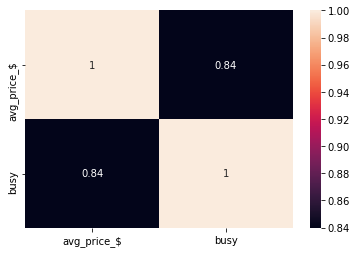

In [36]:
sns.heatmap(df4.corr(), annot=True);# High corrolation between the Price$ and the availability % with 0.84 %

  ### Other Questions will be answered with Listings Data Frame
  

In [37]:
df['property_type'].drop_duplicates().count()#13 different propriety type

13

In [38]:
df.head()#look to the Listings Data frame

id                            listing_url       scrape_id  \
0  12147973  https://www.airbnb.com/rooms/12147973  20160906204935   
1   3075044   https://www.airbnb.com/rooms/3075044  20160906204935   
2      6976      https://www.airbnb.com/rooms/6976  20160906204935   
3   1436513   https://www.airbnb.com/rooms/1436513  20160906204935   
4   7651065   https://www.airbnb.com/rooms/7651065  20160906204935   

  last_scraped                                           name  \
0   2016-09-07                     Sunny Bungalow in the City   
1   2016-09-07              Charming room in pet friendly apt   
2   2016-09-07               Mexican Folk Art Haven in Boston   
3   2016-09-07  Spacious Sunny Bedroom Suite in Historic Home   
4   2016-09-07                            Come Home to Boston   

                                             summary  \
0  Cozy, sunny, family home.  Master bedroom high...   
1  Charming and quiet room in a second floor 1910...   
2  Come stay with a friendly, middle-aged guy in ...   
3  Come experience the comforts of home away from...   
4  My comfy, clean and relaxing home is one block...   

                                               space  \
0  The house has an open and cozy feel at the sam...   
1  Small but cozy and quite room with a full size...   
2  Come stay with a friendly, middle-aged guy in ...   
3  Most places you find in Boston are small howev...   
4  Clean, attractive, private room, one block fro...   

                                         description experiences_offered  \
0  Cozy, sunny, family home.  Master bedroom high...                none   
1  Charming and quiet room in a second floor 1910...                none   
2  Come stay with a friendly, middle-aged guy in ...                none   
3  Come experience the comforts of home away from...                none   
4  My comfy, clean and relaxing home is one block...                none   

                               neighborhood_overview  ... review_scores_value  \
0  Roslindale is quiet, convenient and friendly. ...  ...                 NaN   
1  The room is in Roslindale, a diverse and prima...  ...                 9.0   
2  The LOCATION: Roslindale is a safe and diverse...  ...                10.0   
3  Roslindale is a lovely little neighborhood loc...  ...                10.0   
4  I love the proximity to downtown, the neighbor...  ...                10.0   

  requires_license license jurisdiction_names instant_bookable  \
0                f     NaN                NaN                f   
1                f     NaN                NaN                t   
2                f     NaN                NaN                f   
3                f     NaN                NaN                f   
4                f     NaN                NaN                f   

  cancellation_policy require_guest_profile_picture  \
0            moderate                             f   
1            moderate                             f   
2            moderate                             t   
3            moderate                             f   
4            flexible                             f   

  require_guest_phone_verification calculated_host_listings_count  \
0                                f                              1   
1                                f                              1   
2                                f                              1   
3                                f                              1   
4                                f                              1   

   reviews_per_month  
0                NaN  
1               1.30  
2               0.47  
3               1.00  
4               2.25  

[5 rows x 95 columns]

In [39]:
###Data Cleaning of the $ symbole in the price column
df['price_number in_Listing$'] = df['price'].str.replace('[$, ]', '',regex=True).astype(float)

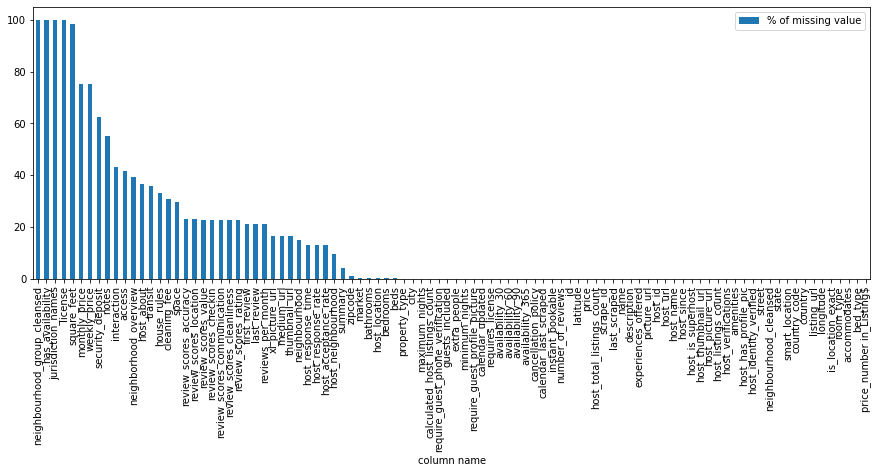

In [40]:
#plot the % missing per column for listings data frame
get_per_missing_all_column(df).set_index('column name').sort_values(by='% of missing value',ascending=False).plot(kind='bar',figsize=(15,5));

In [41]:
get_per_missing_column2(df, 50)

Below the columns name where the missing value more than % 50


column name  % of missing value 50>
0                         notes               55.090656
1  neighbourhood_group_cleansed              100.000000
2                   square_feet               98.437936
3                  weekly_price               75.118550
4                 monthly_price               75.230126
5              security_deposit               62.566248
6              has_availability              100.000000
7                       license              100.000000
8            jurisdiction_names              100.000000

In [42]:
## 'note' is imprtant feature can have important information for that need to keep it and filling the missing value of 'notes'
## NaN --> 'no notes'
df['notes']

0                                                     NaN
1       If you don't have a US cell phone, you can tex...
2       I am in a scenic part of Boston with a couple ...
3       Please be mindful of the property as it is old...
4       I have one roommate who lives on the lower lev...
                              ...                        
3580                                                  NaN
3581                                                  NaN
3582    Depending on when you arrive, I can be here to...
3583                                                  NaN
3584                                                  NaN
Name: notes, Length: 3585, dtype: object

In [43]:
df['notes']=df['notes'].fillna('No notes')##replace nan 

In [44]:
df['notes']

0                                                No notes
1       If you don't have a US cell phone, you can tex...
2       I am in a scenic part of Boston with a couple ...
3       Please be mindful of the property as it is old...
4       I have one roommate who lives on the lower lev...
                              ...                        
3580                                             No notes
3581                                             No notes
3582    Depending on when you arrive, I can be here to...
3583                                             No notes
3584                                             No notes
Name: notes, Length: 3585, dtype: object

In [45]:
list(get_per_missing_column2(df, 50)['column name'])##Remove the column with missing value greater than 50% except 'notes'column

Below the columns name where the missing value more than % 50


['neighbourhood_group_cleansed',
 'square_feet',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'has_availability',
 'license',
 'jurisdiction_names']

In [46]:
df.drop(['neighbourhood_group_cleansed',
 'square_feet',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'has_availability',
 'license',
 'jurisdiction_names'], axis = 1,inplace=True)#remove unnecessary columns

In [47]:
df.head()#above column deleted as wanted

id                            listing_url       scrape_id  \
0  12147973  https://www.airbnb.com/rooms/12147973  20160906204935   
1   3075044   https://www.airbnb.com/rooms/3075044  20160906204935   
2      6976      https://www.airbnb.com/rooms/6976  20160906204935   
3   1436513   https://www.airbnb.com/rooms/1436513  20160906204935   
4   7651065   https://www.airbnb.com/rooms/7651065  20160906204935   

  last_scraped                                           name  \
0   2016-09-07                     Sunny Bungalow in the City   
1   2016-09-07              Charming room in pet friendly apt   
2   2016-09-07               Mexican Folk Art Haven in Boston   
3   2016-09-07  Spacious Sunny Bedroom Suite in Historic Home   
4   2016-09-07                            Come Home to Boston   

                                             summary  \
0  Cozy, sunny, family home.  Master bedroom high...   
1  Charming and quiet room in a second floor 1910...   
2  Come stay with a friendly, middle-aged guy in ...   
3  Come experience the comforts of home away from...   
4  My comfy, clean and relaxing home is one block...   

                                               space  \
0  The house has an open and cozy feel at the sam...   
1  Small but cozy and quite room with a full size...   
2  Come stay with a friendly, middle-aged guy in ...   
3  Most places you find in Boston are small howev...   
4  Clean, attractive, private room, one block fro...   

                                         description experiences_offered  \
0  Cozy, sunny, family home.  Master bedroom high...                none   
1  Charming and quiet room in a second floor 1910...                none   
2  Come stay with a friendly, middle-aged guy in ...                none   
3  Come experience the comforts of home away from...                none   
4  My comfy, clean and relaxing home is one block...                none   

                               neighborhood_overview  ...  \
0  Roslindale is quiet, convenient and friendly. ...  ...   
1  The room is in Roslindale, a diverse and prima...  ...   
2  The LOCATION: Roslindale is a safe and diverse...  ...   
3  Roslindale is a lovely little neighborhood loc...  ...   
4  I love the proximity to downtown, the neighbor...  ...   

  review_scores_location review_scores_value requires_license  \
0                    NaN                 NaN                f   
1                    9.0                 9.0                f   
2                    9.0                10.0                f   
3                   10.0                10.0                f   
4                    9.0                10.0                f   

  instant_bookable cancellation_policy require_guest_profile_picture  \
0                f            moderate                             f   
1                t            moderate                             f   
2                f            moderate                             t   
3                f            moderate                             f   
4                f            flexible                             f   

  require_guest_phone_verification calculated_host_listings_count  \
0                                f                              1   
1                                f                              1   
2                                f                              1   
3                                f                              1   
4                                f                              1   

  reviews_per_month  price_number in_Listing$  
0               NaN                     250.0  
1              1.30                      65.0  
2              0.47                      65.0  
3              1.00                      75.0  
4              2.25                      79.0  

[5 rows x 88 columns]

In [48]:
##Checking what else missing

In [49]:
list(get_per_missing_column2(df, 10)['column name'])#missing with more 10% missing

Below the columns name where the missing value more than % 10


['space',
 'neighborhood_overview',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'neighbourhood',
 'cleaning_fee',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

In [50]:
 ###Type of the missing columns
missing_column=df[['space',
 'neighborhood_overview',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'neighbourhood',
 'cleaning_fee',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']].dtypes


In [51]:
#Modify the missings value for below categorical columns wih "No Comments" it might having important infos
df[['space','neighborhood_overview']]=df[['space','neighborhood_overview']].fillna('No comments')

In [52]:
list(missing_column.index)

['space',
 'neighborhood_overview',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'neighbourhood',
 'cleaning_fee',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

In [53]:
missing_column#type of column with missings value

space                           object
neighborhood_overview           object
transit                         object
access                          object
interaction                     object
house_rules                     object
thumbnail_url                   object
medium_url                      object
xl_picture_url                  object
host_about                      object
host_response_time              object
host_response_rate              object
host_acceptance_rate            object
neighbourhood                   object
cleaning_fee                    object
first_review                    object
last_review                     object
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
reviews_per_month              float64
dtype: object

In [54]:
df[['transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'neighbourhood',
 'cleaning_fee',
 'first_review',
 'last_review']]=df[['transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'neighbourhood',
 'cleaning_fee',
 'first_review',
 'last_review']].fillna('No comments')###filling the missing column with type object with a string "No Comments"

In [55]:
##Remove Unnecessary columns
df.drop(['thumbnail_url',
 'medium_url',
 'xl_picture_url'], axis = 1,inplace=True)

In [56]:
columns= ['review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

In [57]:
##filling  the numirical missed value with the mean
for col in columns:
    df.fillna(df[col].mean(),inplace=True,axis=1)

### Now check what elese missing columns

In [58]:
get_per_missing_all_column(df).set_index('column name').sort_values(by='% of missing value',ascending=False)
#No Missing values now

% of missing value
column name                                 
id                                       0.0
amenities                                0.0
availability_30                          0.0
calendar_updated                         0.0
maximum_nights                           0.0
...                                      ...
host_picture_url                         0.0
host_thumbnail_url                       0.0
host_is_superhost                        0.0
host_acceptance_rate                     0.0
price_number in_Listing$                 0.0

[85 rows x 1 columns]

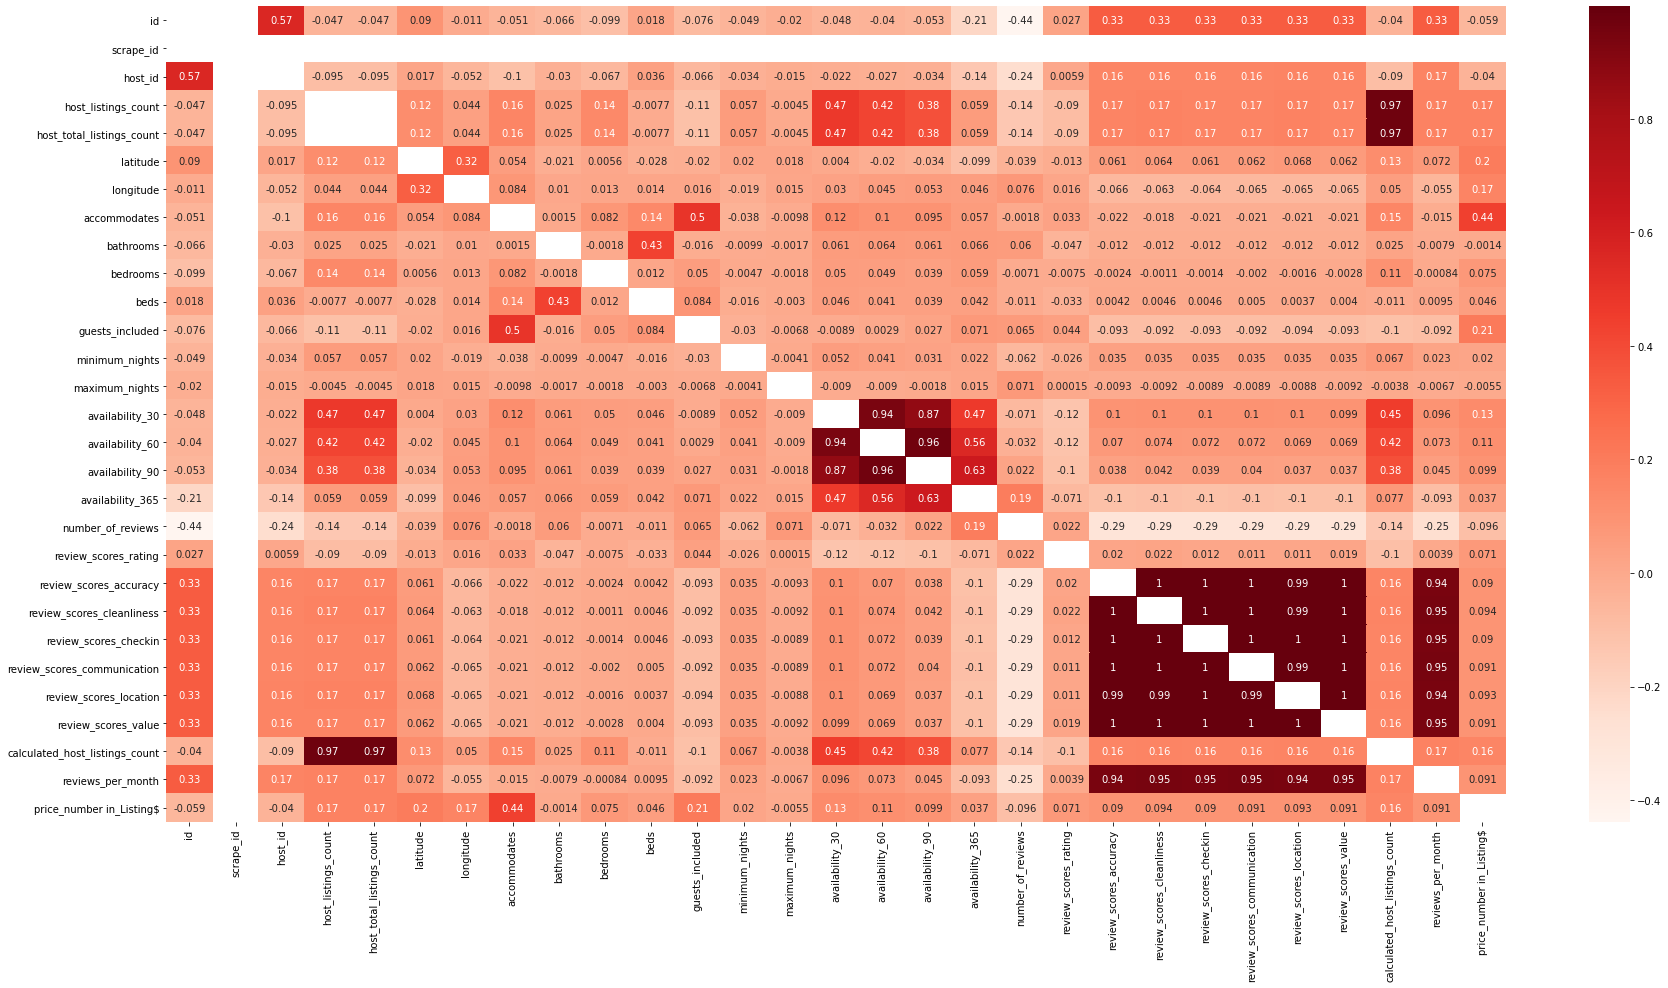

In [59]:
dfCorr = df.corr()
filteredDf = dfCorr[((dfCorr >= .0) | (dfCorr <= -.0)) & (dfCorr !=1.000)]
plt.figure(figsize=(30,15))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()
##filter only on the high corrolated columns

In [60]:
filteredDf['price_number in_Listing$'].sort_values(ascending=False)#high corrolation between the price and the
#"accommodates"&"guests_included"

accommodates                      0.437756
guests_included                   0.211806
latitude                          0.196270
host_listings_count               0.171930
host_total_listings_count         0.171930
longitude                         0.165621
calculated_host_listings_count    0.161855
availability_30                   0.132100
availability_60                   0.112577
availability_90                   0.098526
review_scores_cleanliness         0.093688
review_scores_location            0.092786
review_scores_communication       0.090698
reviews_per_month                 0.090530
review_scores_value               0.090515
review_scores_checkin             0.090287
review_scores_accuracy            0.089728
bedrooms                          0.074734
review_scores_rating              0.070753
beds                              0.046298
availability_365                  0.036694
minimum_nights                    0.020054
bathrooms                        -0.001423
maximum_nig

In [61]:
df['property_type']

0           House
1       Apartment
2       Apartment
3           House
4           House
          ...    
3580    Apartment
3581    Apartment
3582    Apartment
3583    Apartment
3584    Apartment
Name: property_type, Length: 3585, dtype: object

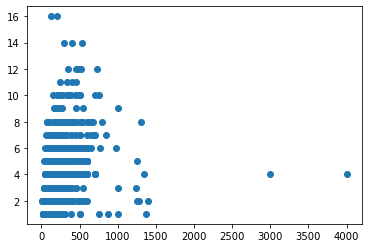

In [62]:
#df[['accommodates','price_number in_Listing$']]
plt.scatter(df['price_number in_Listing$'],df['accommodates']);

In [63]:
#price per accommodates(high number accommodates mean high Price)
df.groupby(['accommodates'])['price_number in_Listing$'].mean().sort_values(ascending=False)

accommodates
12    505.800000
14    410.000000
10    370.473684
11    357.500000
9     351.100000
8     348.581818
7     323.820513
6     275.315271
5     254.800000
4     227.844615
3     180.436916
16    162.500000
2     131.139582
1      85.507973
Name: price_number in_Listing$, dtype: float64

In [64]:
df['property_type'].drop_duplicates().unique()

array(['House', 'Apartment', 'Condominium', 'Villa', 'Bed & Breakfast',
       'Townhouse', 'Entire Floor', 'Loft', 'Guesthouse', 'Boat', 'Dorm',
       'Other', 91.91666666666667, 'Camper/RV'], dtype=object)

In [65]:
df.groupby(['property_type'])['price_number in_Listing$'].mean().sort_values(ascending=False)

property_type
Guesthouse           289.000000
Boat                 268.833333
Other                229.941176
Condominium          190.246753
Villa                189.500000
Loft                 185.410256
Apartment            181.966692
91.91666666666667    168.000000
Townhouse            149.037037
House                131.599644
Bed & Breakfast      129.365854
Entire Floor         122.000000
Dorm                  62.500000
Camper/RV             60.000000
Name: price_number in_Listing$, dtype: float64

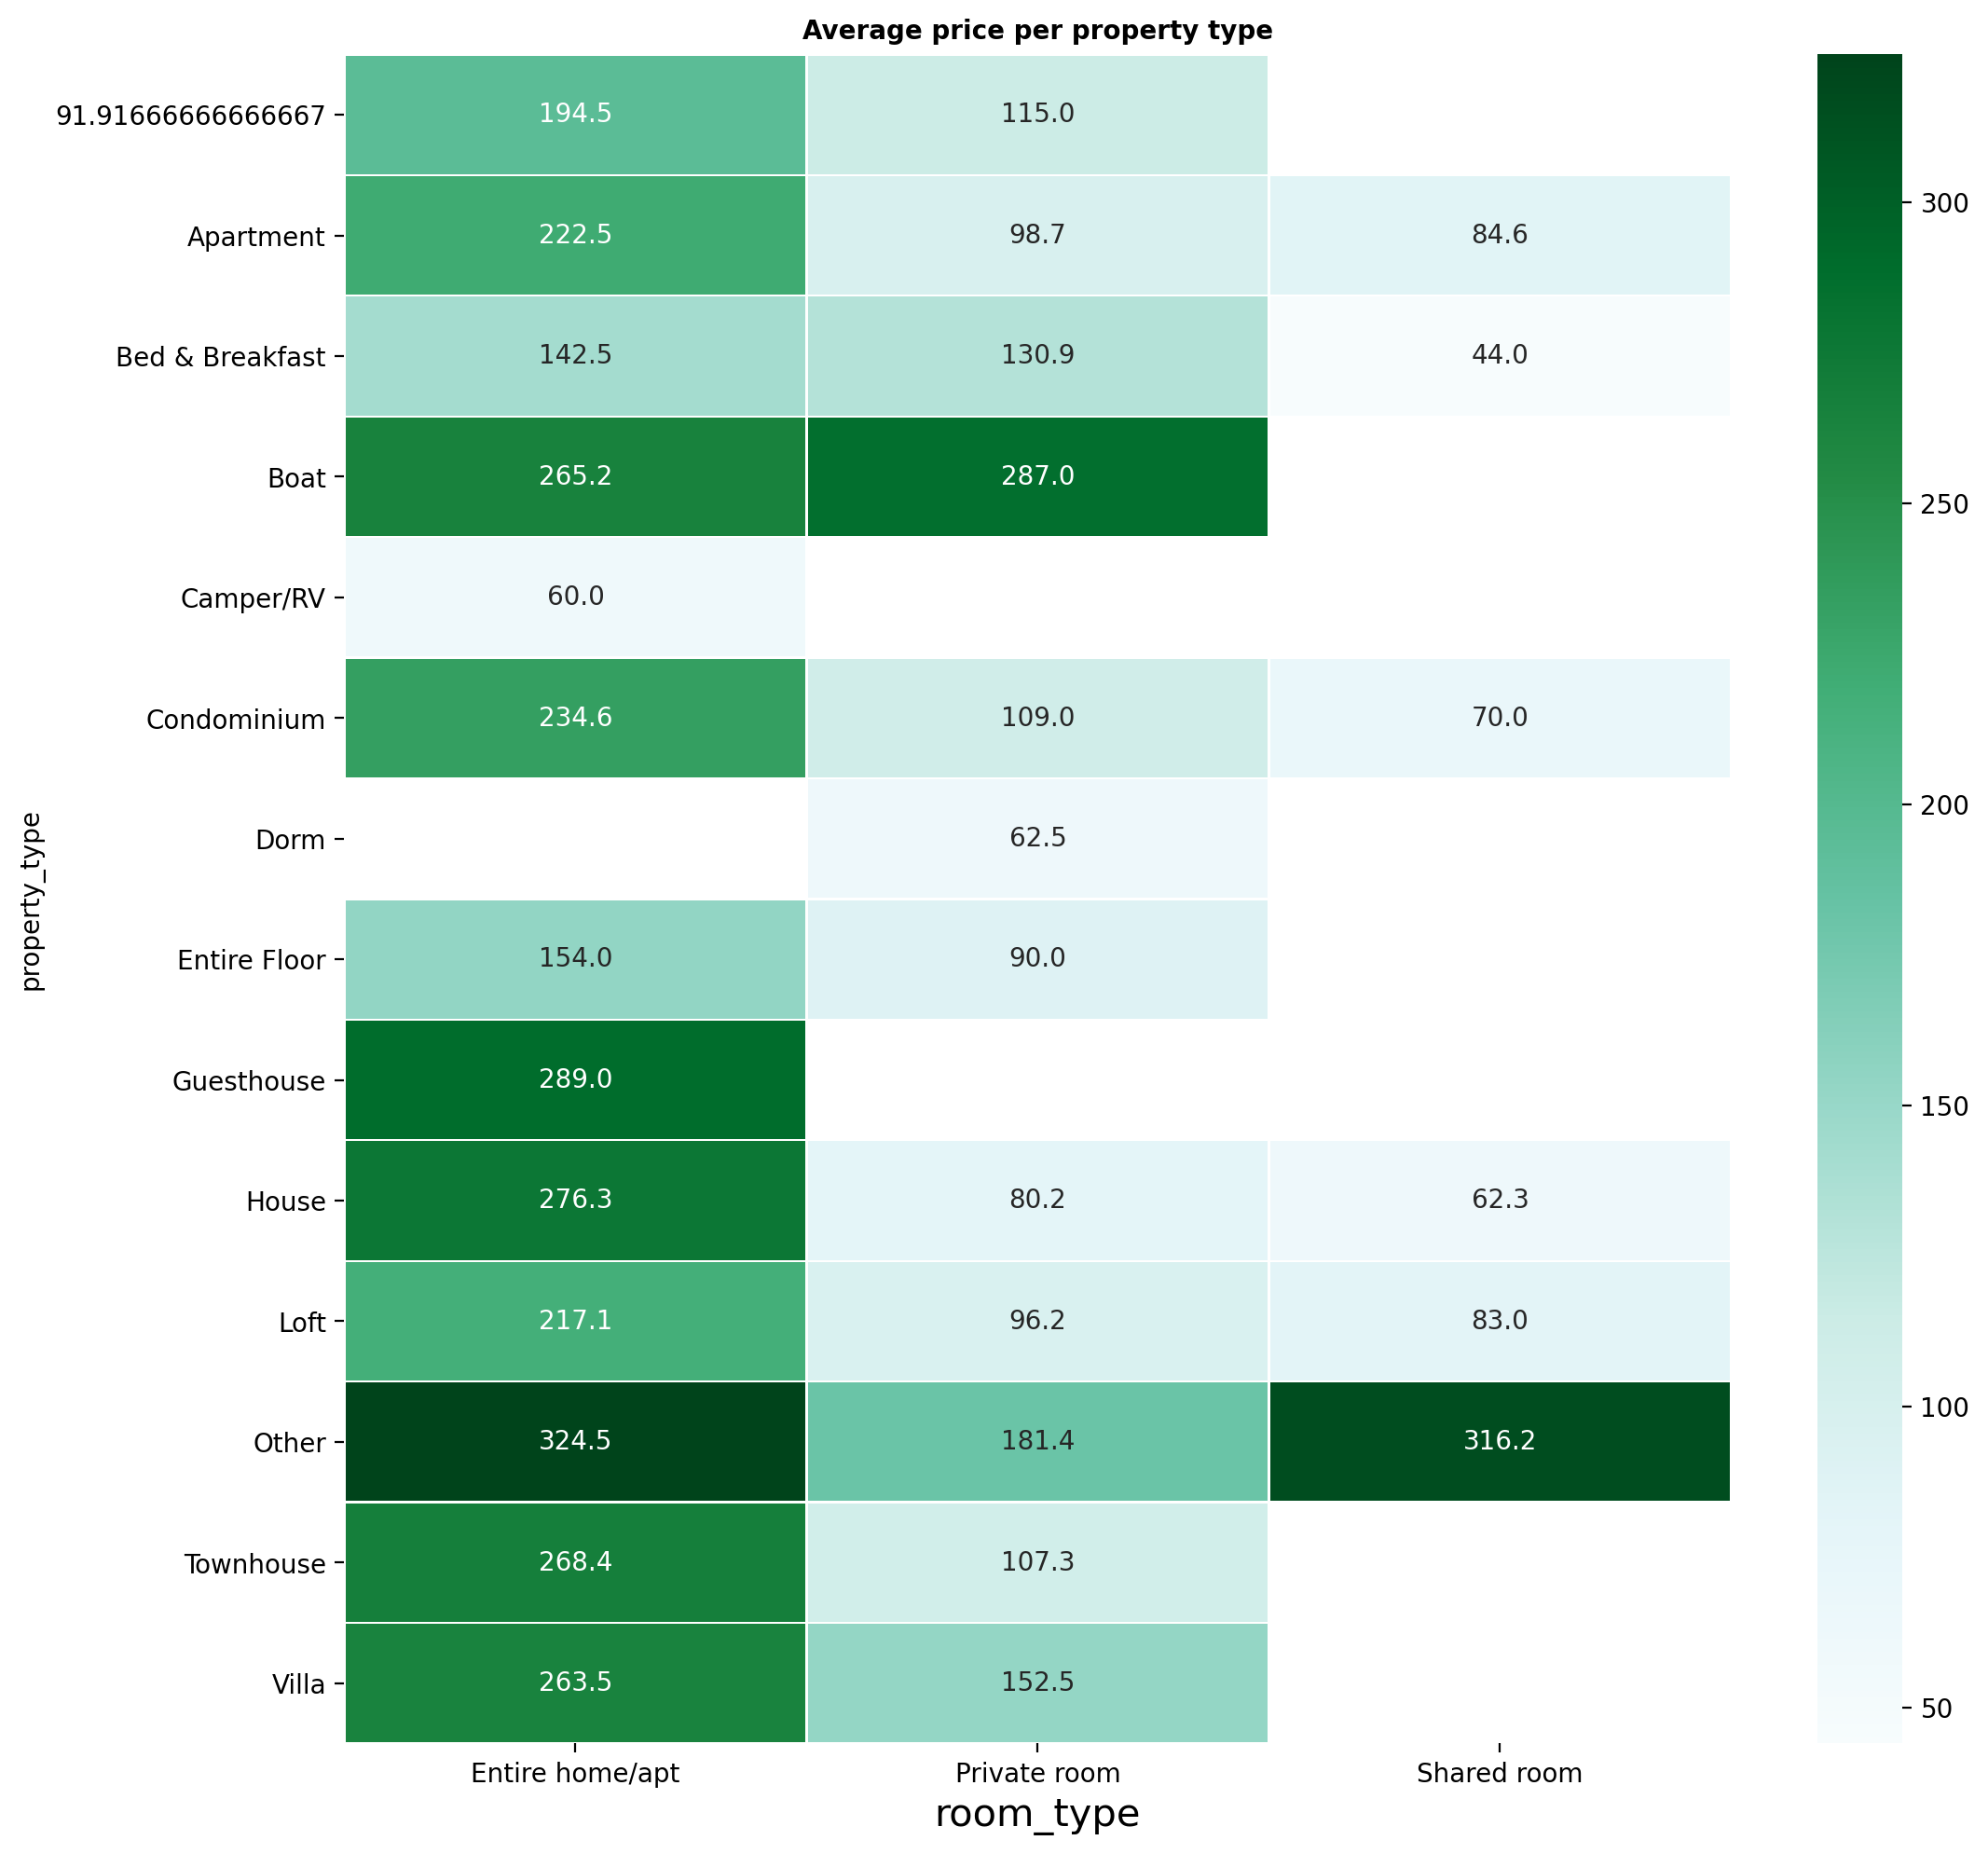

In [66]:
#heatmap between the propriety type and the price
plt.figure(figsize=(12,12), dpi=200)
plt.title('Average price per property type', weight ='bold', size = 10);
plt.xlabel('room_type', size = 15)
plt.ylabel('property_type', size = 10)
sns.heatmap(df.groupby(['property_type','room_type'])['price_number in_Listing$'].mean().unstack(), annot=True, fmt='.1f', linewidths= .5, cmap='BuGn');

#### Corrolation between the price and room_type&Property_type:
As above high corrolation between the price and the room_type mostly shared room has low price compared to private room and Entire home/apt higher than Private_room.

In [67]:
df.groupby(['beds'])['price_number in_Listing$'].mean().sort_values(ascending=False)

beds
6.000000     464.875000
9.000000     443.000000
7.000000     378.500000
8.000000     362.333333
5.000000     351.450000
4.000000     278.924528
3.000000     266.723636
16.000000    229.000000
2.000000     216.158447
0.000000     176.250000
1.000000     131.854042
91.916667     69.777778
Name: price_number in_Listing$, dtype: float64

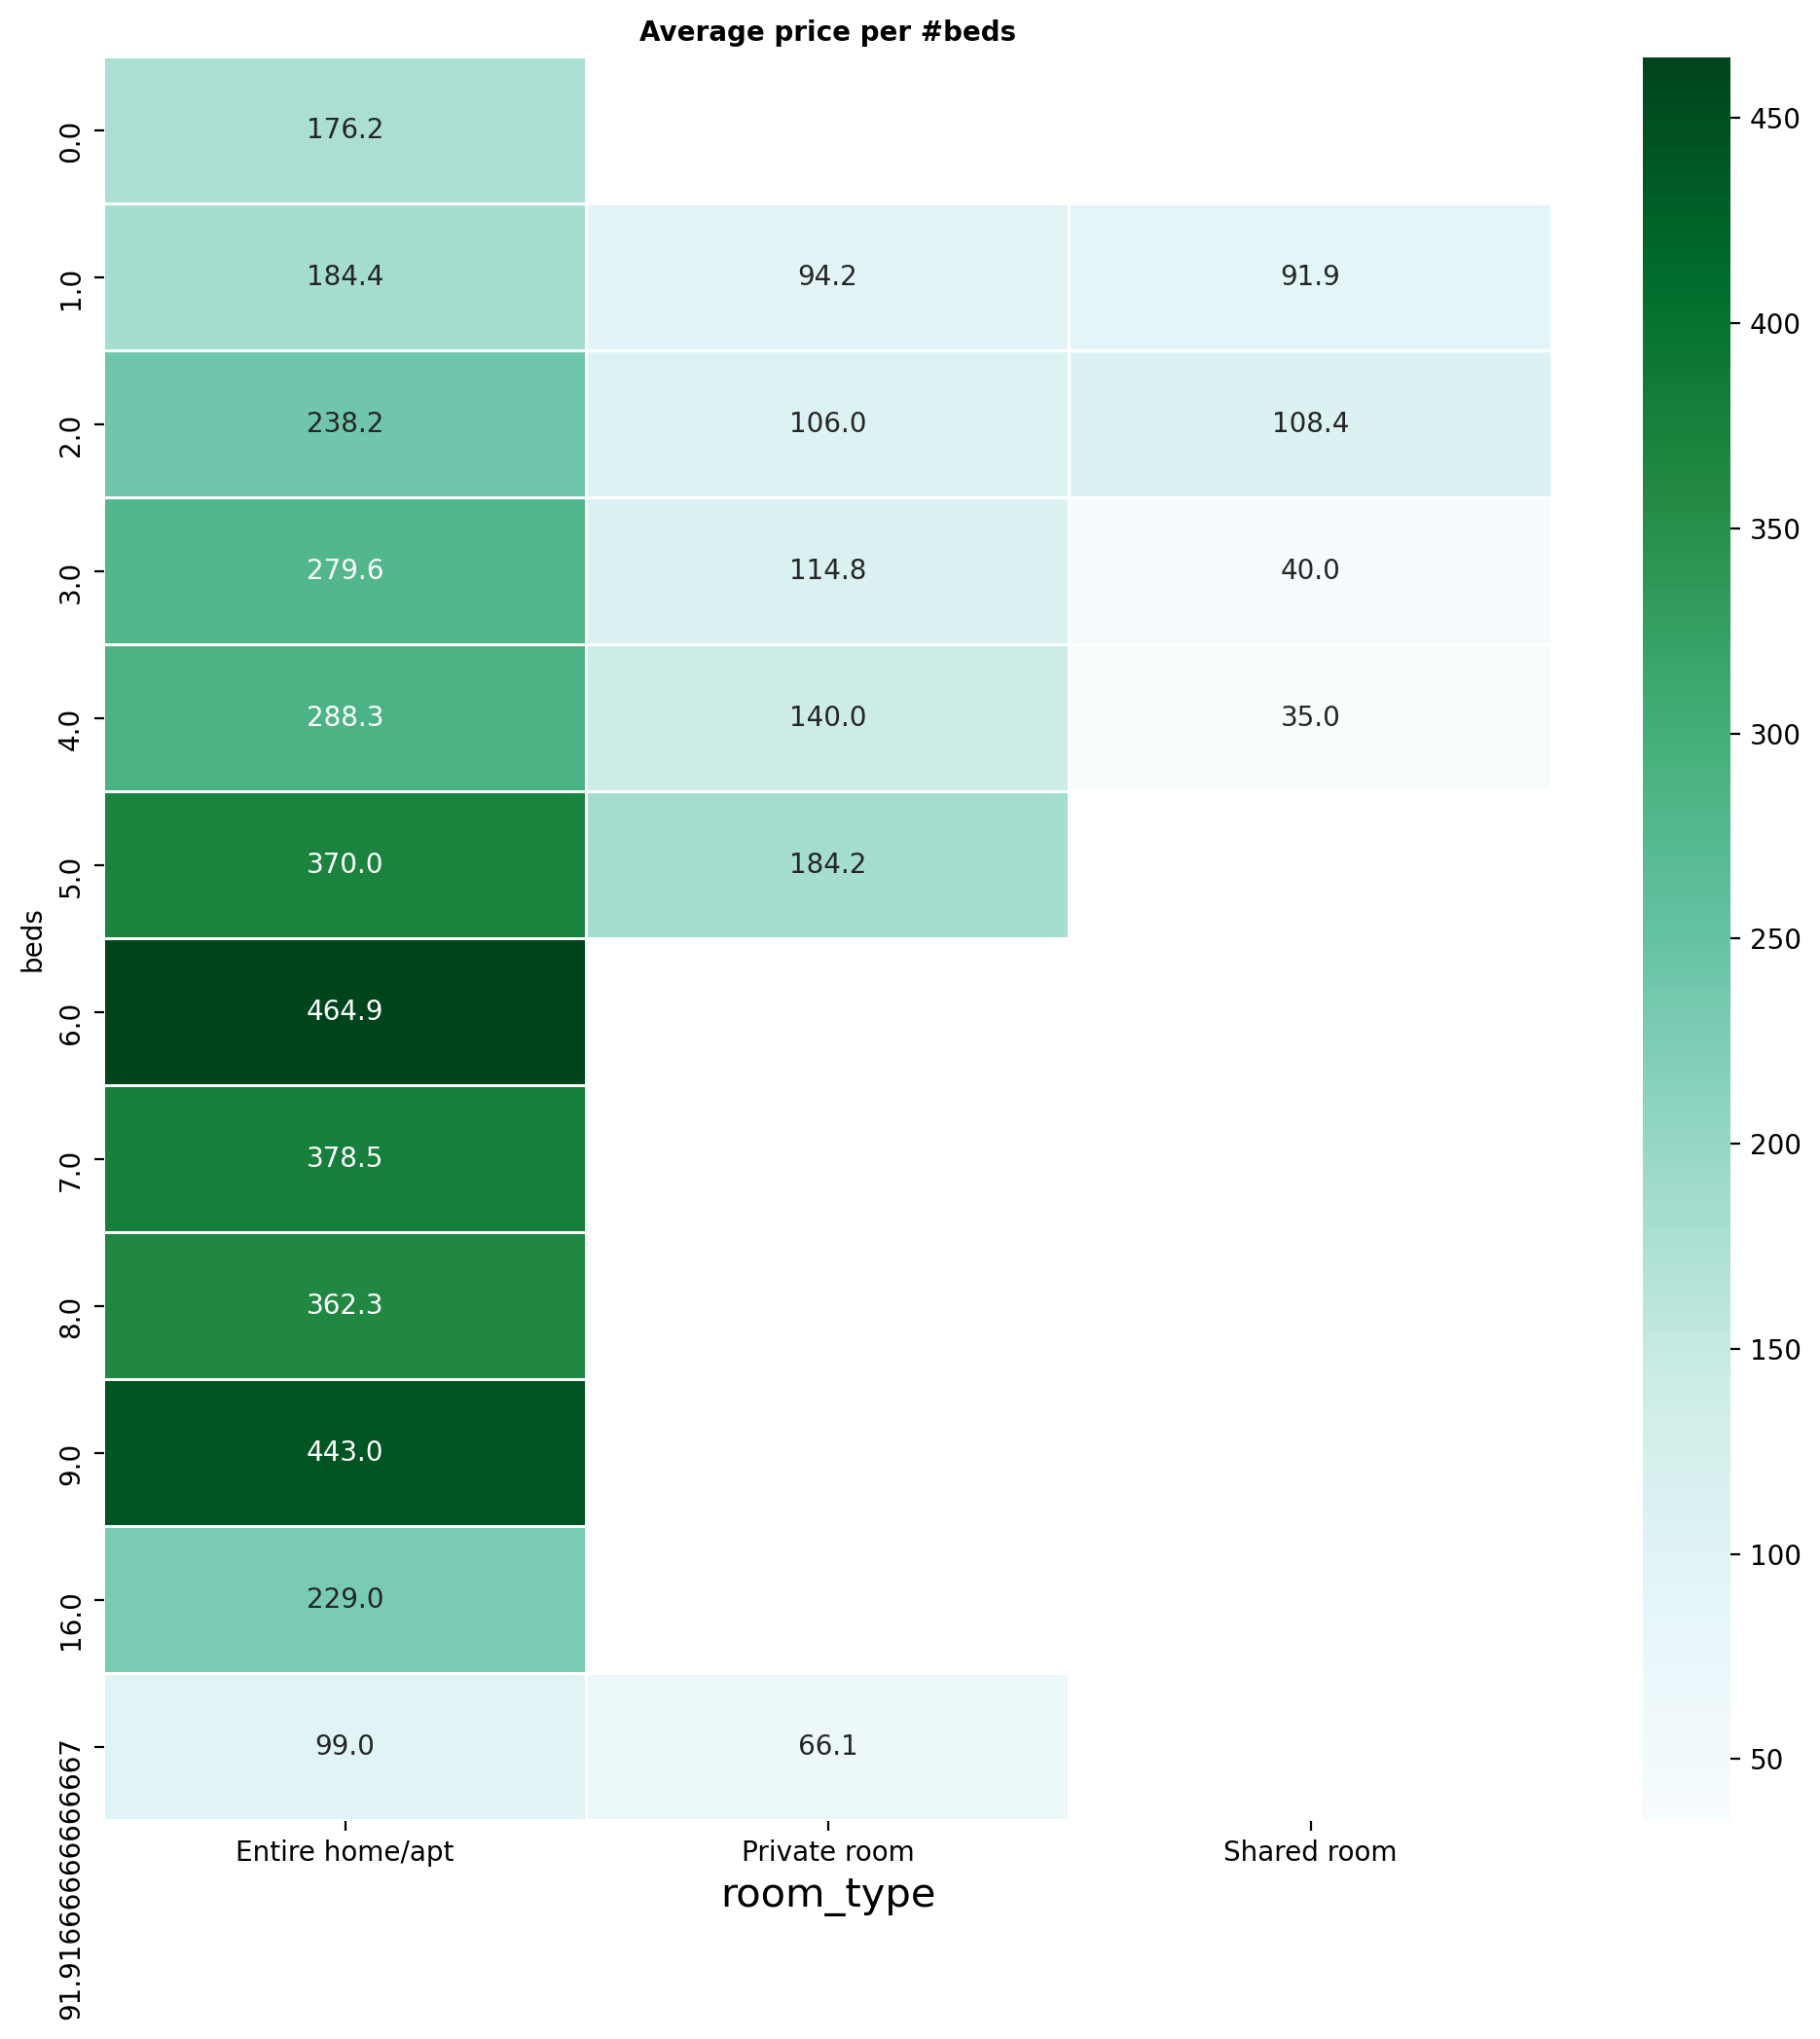

In [68]:
#heatmap between the propriety type and the price
plt.figure(figsize=(12,12), dpi=200)
plt.title('Average price per #beds', weight ='bold', size = 10);
plt.xlabel('room_type', size = 15)
plt.ylabel('beds', size = 10)
sns.heatmap(df.groupby(['beds','room_type'])['price_number in_Listing$'].mean().unstack(), annot=True, fmt='.1f', linewidths= .5, cmap='BuGn');

### Corrolation between the price and room_type&#beds:
### Generally higher #beds means higher price

In [69]:
###Utilise course function to deal with amenities column
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df


In [70]:
look_for=['Internet',
 'Wireless Internet',
 'Kitchen',
 'Pets live on this property',
 'Cat(s)',
 'Heating',
 'Essentials']

In [71]:
vv=df['amenities'].value_counts().reset_index()

In [72]:
vv.rename(columns={'index': 't', 'amenities': 'count'}, inplace=True)

In [73]:
vv

t  count
0                                                    {}     32
1     {TV,"Cable TV","Wireless Internet","Air Condit...     15
2     {TV,"Cable TV","Wireless Internet","Air Condit...     14
3     {TV,"Cable TV",Internet,"Wireless Internet","A...     14
4     {TV,"Cable TV",Internet,"Wireless Internet","A...     11
...                                                 ...    ...
3087  {TV,"Cable TV",Internet,"Wireless Internet","A...      1
3088  {TV,Internet,"Wireless Internet","Air Conditio...      1
3089  {TV,"Cable TV",Internet,"Wireless Internet","A...      1
3090  {TV,"Wireless Internet","Air Conditioning",Kit...      1
3091  {TV,Internet,"Wireless Internet",Kitchen,"Free...      1

[3092 rows x 2 columns]

In [74]:
out=total_count(vv, 't', 'count', look_for)##count per amenities type

In [75]:
out##count for each amenitie type

t  count
0                    Internet   3459
1           Wireless Internet   3421
5                     Heating   3384
2                     Kitchen   3284
6                  Essentials   2994
3  Pets live on this property    429
4                      Cat(s)    181

In [76]:
import plotly.graph_objects as go

fig = go.Figure(go.Bar(
            x=out['count'],
            y=out['t'],
            orientation='h'))

fig.show()
### as below the The Top amenities are in the following order:
##Internet, Wireless Internet, Heating, kitchen

### Question III:Which room types in each neighborhood have high prices?

In [77]:
df[['neighbourhood_cleansed','price_number in_Listing$']]

neighbourhood_cleansed  price_number in_Listing$
0                Roslindale                     250.0
1                Roslindale                      65.0
2                Roslindale                      65.0
3                Roslindale                      75.0
4                Roslindale                      79.0
...                     ...                       ...
3580            Charlestown                      69.0
3581                Allston                     150.0
3582            Charlestown                     198.0
3583            Charlestown                      65.0
3584            Charlestown                      65.0

[3585 rows x 2 columns]

In [78]:
df.groupby(['neighbourhood_cleansed','room_type'])['price_number in_Listing$'].mean().sort_values(ascending=False)#Highest neighbourhood

neighbourhood_cleansed   room_type      
South Boston Waterfront  Entire home/apt    326.352113
Bay Village              Entire home/apt    299.550000
Leather District         Entire home/apt    288.000000
Back Bay                 Entire home/apt    255.076046
Fenway                   Entire home/apt    253.552885
                                               ...    
East Boston              Shared room         55.333333
Dorchester               Shared room         49.250000
Charlestown              Shared room         47.000000
Mission Hill             Shared room         40.875000
Hyde Park                Shared room         31.000000
Name: price_number in_Listing$, Length: 69, dtype: float64

In [79]:
df.groupby(['neighbourhood_cleansed','room_type'])['price_number in_Listing$'].mean().sort_values(ascending=True)#lowest expensive neighbourhood

neighbourhood_cleansed   room_type      
Hyde Park                Shared room         31.000000
Mission Hill             Shared room         40.875000
Charlestown              Shared room         47.000000
Dorchester               Shared room         49.250000
East Boston              Shared room         55.333333
                                               ...    
Fenway                   Entire home/apt    253.552885
Back Bay                 Entire home/apt    255.076046
Leather District         Entire home/apt    288.000000
Bay Village              Entire home/apt    299.550000
South Boston Waterfront  Entire home/apt    326.352113
Name: price_number in_Listing$, Length: 69, dtype: float64

In [80]:
import plotly.express as px
df2 = df.groupby(['neighbourhood_cleansed','room_type'])['price_number in_Listing$'].mean().reset_index()
fig = px.scatter(df2, x="neighbourhood_cleansed", y="price_number in_Listing$", color="room_type",size='price_number in_Listing$')
fig.show()

### Question IV: Which room types in each street have high prices?

In [81]:
df.groupby(['neighbourhood_cleansed','street',"room_type"])['price_number in_Listing$'].mean().reset_index().sort_values(by='price_number in_Listing$',ascending=False).head(20)

neighbourhood_cleansed  \
800                    Fenway   
248               Beacon Hill   
1489  South Boston Waterfront   
1491  South Boston Waterfront   
796                    Fenway   
395               Charlestown   
1473             South Boston   
1141             Mission Hill   
1596                South End   
1581                South End   
1322                  Roxbury   
1405             South Boston   
1468             South Boston   
914             Jamaica Plain   
164                  Back Bay   
1488  South Boston Waterfront   
1212                North End   
648                  Downtown   
418               Charlestown   
408               Charlestown   

                                                 street        room_type  \
800       Edgerly Road, Boston, MA 02115, United States     Private room   
248   Myrtle Street, unit, Boston, MA 02114, United ...  Entire home/apt   
1489  Boston Wharf Road, Boston, MA 02210, United St...  Entire home/apt   
1491   Congress Street, Boston, MA 02210, United States  Entire home/apt   
796   Commonwealth Avenue, Boston, MA 02215, United ...  Entire home/apt   
395    8th Street, Charlestown, MA 02129, United States  Entire home/apt   
1473   West 4th Street, Boston, MA 02127, United States  Entire home/apt   
1141   Hillside Street, Boston, MA 02115, United States     Private room   
1596  West Canton Street, Boston, MA 02118, United S...  Entire home/apt   
1581        Union Park, Boston, MA 02118, United States  Entire home/apt   
1322   Columbus Avenue, Boston, MA 02118, United States     Private room   
1405    Dresser Street, Boston, MA 02127, United States  Entire home/apt   
1468   West 1st Street, Boston, MA 02127, United States  Entire home/apt   
914          Centre St, Boston, MA 02130, United States  Entire home/apt   
164   Huntington Avenue, Boston, MA 02116, United St...  Entire home/apt   
1488          B Street, Boston, MA 02127, United States  Entire home/apt   
1212         Fulton St, Boston, MA 02109, United States  Entire home/apt   
648                     Boston, MA 02116, United States  Entire home/apt   
418           Cross St, Boston, MA 02129, United States  Entire home/apt   
408     Chappie Street, Boston, MA 02129, United States  Entire home/apt   

      price_number in_Listing$  
800                1372.000000  
248                1345.000000  
1489               1250.000000  
1491               1209.333333  
796                1137.250000  
395                1000.000000  
1473               1000.000000  
1141                872.000000  
1596                866.666667  
1581                800.000000  
1322                741.500000  
1405                700.000000  
1468                700.000000  
914                 625.000000  
164                 600.000000  
1488                600.000000  
1212                600.000000  
648                 600.000000  
418                 600.000000  
408                 599.000000

In [82]:
import plotly.express as px
df2 = df.groupby(['neighbourhood_cleansed','street',"room_type"])['price_number in_Listing$'].mean().reset_index().sort_values(by='price_number in_Listing$',ascending=False).head(20)
fig = px.scatter(df2, x="street", y="price_number in_Listing$",size='price_number in_Listing$',color="room_type")
fig.show()